In [ ]:
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization, GlobalMaxPool2D
from tensorflow.keras import regularizers


# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, DepthwiseConv2D, GlobalAveragePooling2D, Dense, Reshape, Multiply
from tensorflow.keras.models import Model
def simplified_efficient_b3_with_attention(input_shape=(224, 224, 3), num_classes=4):
    inputs = Input(shape=input_shape)

    # Stem convolutional block
    x = Conv2D(32, (3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Building blocks inspired by EfficientNet
    filters = 32
    block_config = [
        {'expansion': 1, 'out_filters': 16, 'repeats': 1, 'stride': 1},
        {'expansion': 6, 'out_filters': 24, 'repeats': 2, 'stride': 2},
        {'expansion': 6, 'out_filters': 40, 'repeats': 2, 'stride': 2},
        {'expansion': 6, 'out_filters': 80, 'repeats': 3, 'stride': 2},
    ]

    for block in block_config:
        num_filters = block['out_filters']
        num_repeats = block['repeats']
        expansion_factor = block['expansion']
        stride = block['stride']

        for _ in range(num_repeats):
            # Depthwise Convolution
            x = DepthwiseConv2D(kernel_size=3, strides=stride, padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            # Pointwise Convolution
            x = Conv2D(num_filters, kernel_size=1, strides=1, padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            # Squeeze-and-Excitation block (Attention mechanism)
            squeeze = GlobalAveragePooling2D()(x)
            squeeze = Reshape((1, 1, num_filters))(squeeze)
            excitation = Dense(num_filters // 16, activation='relu')(squeeze)
            excitation = Dense(num_filters, activation='sigmoid')(excitation)
            excitation = Multiply()([x, excitation])

    # Classification head
    x = GlobalAveragePooling2D()(excitation)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the modified model with attention mechanisms
simplified_eff_b3_with_attention = simplified_efficient_b3_with_attention()
simplified_eff_b3_with_attention.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_20 (Conv2D)          (None, 112, 112, 32)         896       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_37 (Ba  (None, 112, 112, 32)         128       ['conv2d_20[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_37 (Activation)  (None, 112, 112, 32)         0         ['batch_normalization_37

                                                                                                  
 batch_normalization_46 (Ba  (None, 7, 7, 40)             160       ['depthwise_conv2d_21[0][0]'] 
 tchNormalization)                                                                                
                                                                                                  
 activation_46 (Activation)  (None, 7, 7, 40)             0         ['batch_normalization_46[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_25 (Conv2D)          (None, 7, 7, 40)             1640      ['activation_46[0][0]']       
                                                                                                  
 batch_normalization_47 (Ba  (None, 7, 7, 40)             160       ['conv2d_25[0][0]']           
 tchNormal

                                                                    0][0]']                       
                                                                                                  
Total params: 28889 (112.85 KB)
Trainable params: 27385 (106.97 KB)
Non-trainable params: 1504 (5.88 KB)
__________________________________________________________________________________________________


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, DepthwiseConv2D, GlobalAveragePooling2D, Dense, Reshape, Multiply
from tensorflow.keras.models import Model

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, DepthwiseConv2D, GlobalAveragePooling2D, Dense, Reshape, Multiply
from tensorflow.keras.models import Model
def simplified_efficient_b3_with_attention(input_shape=(224, 224, 3), num_classes=4):
    inputs = Input(shape=input_shape)

    # Stem convolutional block
    x = Conv2D(32, (3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Building blocks inspired by EfficientNet
    filters = 32
    block_config = [
        {'expansion': 1, 'out_filters': 16, 'repeats': 1, 'stride': 1},
        {'expansion': 6, 'out_filters': 24, 'repeats': 2, 'stride': 2},
        {'expansion': 6, 'out_filters': 40, 'repeats': 2, 'stride': 2},
        {'expansion': 6, 'out_filters': 80, 'repeats': 3, 'stride': 2},
    ]

    for block in block_config:
        num_filters = block['out_filters']
        num_repeats = block['repeats']
        expansion_factor = block['expansion']
        stride = block['stride']

        for _ in range(num_repeats):
            # Depthwise Convolution
            x = DepthwiseConv2D(kernel_size=3, strides=stride, padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            # Pointwise Convolution
            x = Conv2D(num_filters, kernel_size=1, strides=1, padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            # Squeeze-and-Excitation block (Attention mechanism)
            squeeze = GlobalAveragePooling2D()(x)
            squeeze = Reshape((1, 1, num_filters))(squeeze)
            excitation = Dense(num_filters // 16, activation='relu')(squeeze)
            excitation = Dense(num_filters, activation='sigmoid')(excitation)
            excitation = Multiply()([x, excitation])

    # Classification head
    x = GlobalAveragePooling2D()(excitation)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the modified model with attention mechanisms
simplified_eff_b3_with_attention = simplified_efficient_b3_with_attention()
simplified_eff_b3_with_attention.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_20 (Conv2D)          (None, 112, 112, 32)         896       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_37 (Ba  (None, 112, 112, 32)         128       ['conv2d_20[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_37 (Activation)  (None, 112, 112, 32)         0         ['batch_normalization_37

                                                                                                  
 batch_normalization_46 (Ba  (None, 7, 7, 40)             160       ['depthwise_conv2d_21[0][0]'] 
 tchNormalization)                                                                                
                                                                                                  
 activation_46 (Activation)  (None, 7, 7, 40)             0         ['batch_normalization_46[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_25 (Conv2D)          (None, 7, 7, 40)             1640      ['activation_46[0][0]']       
                                                                                                  
 batch_normalization_47 (Ba  (None, 7, 7, 40)             160       ['conv2d_25[0][0]']           
 tchNormal

                                                                    0][0]']                       
                                                                                                  
Total params: 28889 (112.85 KB)
Trainable params: 27385 (106.97 KB)
Non-trainable params: 1504 (5.88 KB)
__________________________________________________________________________________________________


In [ ]:
import os
import shutil
import random

# Define directories
input_dir = 'C:/Users/u2285811/Downloads/archive/Alzheimer_s Dataset'  # Directory containing train and test directories
output_dir = 'C:/Users/u2285811/OneDrive - University of Huddersfield/project_files/data_aug'  # Directory to save limited dataset
os.makedirs(output_dir, exist_ok=True)

train_dir = os.path.join(input_dir, 'train')
test_dir = os.path.join(input_dir, 'test')
limited_train_dir = os.path.join(output_dir, 'train')
limited_test_dir = os.path.join(output_dir, 'test')
os.makedirs(limited_train_dir, exist_ok=True)
os.makedirs(limited_test_dir, exist_ok=True)

# Define limits for train and test images
train_limit = 700
test_limit = 150

# Loop through each class in the train directory
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    limited_class_dir = os.path.join(limited_train_dir, class_name)
    os.makedirs(limited_class_dir, exist_ok=True)

    # Get all images in the class directory
    images = [img for img in os.listdir(class_dir) if img.endswith(('jpeg', 'jpg', 'png'))]
    random.shuffle(images)

    # Copy limited number of images to the new directory
    for i, image in enumerate(images):
        if i < train_limit:
            shutil.copy2(os.path.join(class_dir, image), os.path.join(limited_class_dir, image))

# Loop through each class in the test directory
for class_name in os.listdir(test_dir):
    class_dir = os.path.join(test_dir, class_name)
    limited_class_dir = os.path.join(limited_test_dir, class_name)
    os.makedirs(limited_class_dir, exist_ok=True)

    # Get all images in the class directory
    images = [img for img in os.listdir(class_dir) if img.endswith(('jpeg', 'jpg', 'png'))]
    random.shuffle(images)

    # Copy limited number of images to the new directory
    for i, image in enumerate(images):
        if i < test_limit:
            shutil.copy2(os.path.join(class_dir, image), os.path.join(limited_class_dir, image))


In [ ]:
import os
import tensorflow as tf

In [ ]:


# Function to perform data augmentation
def augment_image(image):
    # Flip the image horizontally and vertically
    flipped_horizontal = tf.image.flip_left_right(image)
    flipped_vertical = tf.image.flip_up_down(image)

    # Rotate the image by 45 degrees
    rotated = tf.image.rot90(image, k=1)

    # Shear the image
    # Shearing can be achieved by affine transformation using `tf.keras.preprocessing.image.apply_affine_transform`
    # You might need to adjust the shear parameters for your images
    sheared = tf.keras.preprocessing.image.apply_affine_transform(
        image.numpy(), shear=0.2, fill_mode='reflect'
    )
    sheared = tf.convert_to_tensor(sheared)

    # Scale the image
    scaled = tf.image.resize(image, (int(image.shape[0] * 0.8), int(image.shape[1] * 0.8)))

    return flipped_horizontal, flipped_vertical, rotated, sheared, scaled

# Define directories
input_dir = 'C:/Users/u2285811/OneDrive - University of Huddersfield/project_files/data_aug/train/ModerateDemented'  # Directory containing original images
output_dir = 'C:/Users/u2285811/OneDrive - University of Huddersfield/project_files/data_aug/train/ModerateDemented'  # Directory to save augmented images
os.makedirs(output_dir, exist_ok=True)

# List all image files in the input directory
image_files = [file for file in os.listdir(input_dir) if file.endswith(('jpeg', 'jpg', 'png'))]

# Iterate through each image, perform augmentation, and save the augmented images
for image_file in image_files:
    # Load image
    image_path = os.path.join(input_dir, image_file)
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)

    # Perform augmentation
    flipped_horizontal, flipped_vertical, rotated, sheared, scaled = augment_image(image)

    # Save augmented images to the output directory
    tf.keras.preprocessing.image.save_img(
        os.path.join(output_dir, 'flipped_horizontal_' + image_file), flipped_horizontal
    )
    tf.keras.preprocessing.image.save_img(
        os.path.join(output_dir, 'flipped_vertical_' + image_file), flipped_vertical
    )
    tf.keras.preprocessing.image.save_img(
        os.path.join(output_dir, 'rotated_' + image_file), rotated
    )
    tf.keras.preprocessing.image.save_img(
        os.path.join(output_dir, 'sheared_' + image_file), sheared
    )
    tf.keras.preprocessing.image.save_img(
        os.path.join(output_dir, 'scaled_' + image_file), scaled
    )


In [ ]:
import os
import tensorflow as tf

# Function to perform additional data augmentation
def additional_augmentations(image):
    # Apply random contrast adjustment
    adjusted_contrast = tf.image.random_contrast(image, lower=0.5, upper=1.5)

    # Apply random hue adjustment
    adjusted_hue = tf.image.random_hue(image, max_delta=0.2)

    # Apply random saturation adjustment
    adjusted_saturation = tf.image.random_saturation(image, lower=0.5, upper=1.5)

    return adjusted_contrast, adjusted_hue, adjusted_saturation

# Define directories
input_dir = 'C:/Users/u2285811/OneDrive - University of Huddersfield/project_files/data_aug/train/ModerateDemented'  # Directory containing original images
output_dir = 'C:/Users/u2285811/OneDrive - University of Huddersfield/project_files/data_aug/train/ModerateDemented'  # Directory to save augmented images
os.makedirs(output_dir, exist_ok=True)

# List all image files in the input directory
image_files = [file for file in os.listdir(input_dir) if file.endswith(('jpeg', 'jpg', 'png'))]

# Count the existing images in the output directory
current_count = len([file for file in os.listdir(output_dir) if file.startswith('augmented')])

# Set a limit for the total number of augmented images
target_count = 700

# Iterate through each image, perform augmentation, and save the augmented images
for image_file in image_files:
    if current_count >= target_count:
        break

    # Load image
    image_path = os.path.join(input_dir, image_file)
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)

    # Perform additional augmentations
    adjusted_contrast, adjusted_hue, adjusted_saturation = additional_augmentations(image)

    # Save augmented images to the output directory
    for idx, augmented_image in enumerate([adjusted_contrast, adjusted_hue, adjusted_saturation]):
        if current_count >= target_count:
            break

        tf.keras.preprocessing.image.save_img(
            os.path.join(output_dir, f'augmented_additional_{current_count}_{idx}_{image_file}'), augmented_image.numpy()
        )
        current_count += 1


In [ ]:
import os
import random

# Directory containing the images
directory = 'C:/Users/u2285811/OneDrive - University of Huddersfield/project_files/data_aug/train/ModerateDemented'  # Replace with your directory path

# List all image files in the directory
image_files = [file for file in os.listdir(directory) if file.endswith(('jpeg', 'jpg', 'png'))]

# Randomly select and delete 300 images
images_to_delete = random.sample(image_files, 300)
for image_file in images_to_delete:
    os.remove(os.path.join(directory, image_file))


In [ ]:


# Function to perform data augmentation
def augment_image(image):
    # Flip the image horizontally and vertically
    flipped_horizontal = tf.image.flip_left_right(image)
    flipped_vertical = tf.image.flip_up_down(image)

    # Rotate the image by 45 degrees
    rotated = tf.image.rot90(image, k=1)

    # Shear the image
    # Shearing can be achieved by affine transformation using `tf.keras.preprocessing.image.apply_affine_transform`
    # You might need to adjust the shear parameters for your images
    sheared = tf.keras.preprocessing.image.apply_affine_transform(
        image.numpy(), shear=0.2, fill_mode='reflect'
    )
    sheared = tf.convert_to_tensor(sheared)

    # Scale the image
    scaled = tf.image.resize(image, (int(image.shape[0] * 0.8), int(image.shape[1] * 0.8)))

    return flipped_horizontal, flipped_vertical, rotated, sheared, scaled

# Define directories
input_dir = 'C:/Users/u2285811/OneDrive - University of Huddersfield/project_files/data_aug/test/ModerateDemented'  # Directory containing original images
output_dir = 'C:/Users/u2285811/OneDrive - University of Huddersfield/project_files/data_aug/test/ModerateDemented'  # Directory to save augmented images
os.makedirs(output_dir, exist_ok=True)

# List all image files in the input directory
image_files = [file for file in os.listdir(input_dir) if file.endswith(('jpeg', 'jpg', 'png'))]

# Iterate through each image, perform augmentation, and save the augmented images
for image_file in image_files:
    # Load image
    image_path = os.path.join(input_dir, image_file)
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)

    # Perform augmentation
    flipped_horizontal, flipped_vertical, rotated, sheared, scaled = augment_image(image)

    # Save augmented images to the output directory
    tf.keras.preprocessing.image.save_img(
        os.path.join(output_dir, 'flipped_horizontal_' + image_file), flipped_horizontal
    )
    tf.keras.preprocessing.image.save_img(
        os.path.join(output_dir, 'flipped_vertical_' + image_file), flipped_vertical
    )
    tf.keras.preprocessing.image.save_img(
        os.path.join(output_dir, 'rotated_' + image_file), rotated
    )
    tf.keras.preprocessing.image.save_img(
        os.path.join(output_dir, 'sheared_' + image_file), sheared
    )
    tf.keras.preprocessing.image.save_img(
        os.path.join(output_dir, 'scaled_' + image_file), scaled
    )


In [ ]:
import os
import tensorflow as tf

# Function to perform additional data augmentation
def additional_augmentations(image):
    # Apply random contrast adjustment
    adjusted_contrast = tf.image.random_contrast(image, lower=0.5, upper=1.5)

    # Apply random hue adjustment
    adjusted_hue = tf.image.random_hue(image, max_delta=0.2)

    # Apply random saturation adjustment
    adjusted_saturation = tf.image.random_saturation(image, lower=0.5, upper=1.5)

    return adjusted_contrast, adjusted_hue, adjusted_saturation

# Define directories
input_dir = 'C:/Users/u2285811/OneDrive - University of Huddersfield/project_files/data_aug/test/ModerateDemented'  # Directory containing original images
output_dir = 'C:/Users/u2285811/OneDrive - University of Huddersfield/project_files/data_aug/test/ModerateDemented'  # Directory to save augmented images
os.makedirs(output_dir, exist_ok=True)

# List all image files in the input directory
image_files = [file for file in os.listdir(input_dir) if file.endswith(('jpeg', 'jpg', 'png'))]

# Count the existing images in the output directory
current_count = len([file for file in os.listdir(output_dir) if file.startswith('augmented')])

# Set a limit for the total number of augmented images
target_count = 75

# Iterate through each image, perform augmentation, and save the augmented images
for image_file in image_files:
    if current_count >= target_count:
        break

    # Load image
    image_path = os.path.join(input_dir, image_file)
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)

    # Perform additional augmentations
    adjusted_contrast, adjusted_hue, adjusted_saturation = additional_augmentations(image)

    # Save augmented images to the output directory
    for idx, augmented_image in enumerate([adjusted_contrast, adjusted_hue, adjusted_saturation]):
        if current_count >= target_count:
            break

        tf.keras.preprocessing.image.save_img(
            os.path.join(output_dir, f'augmented_additional_{current_count}_{idx}_{image_file}'), augmented_image.numpy()
        )
        current_count += 1


In [ ]:
# Generate data paths with labels
def define_paths(data_dir):
    filepaths = []
    labels = []

    folds = os.listdir(data_dir)
    for fold in folds:
        foldpath = os.path.join(data_dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold)

    return filepaths, labels


# Concatenate data paths with labels into one dataframe ( to later be fitted into the model )
def define_df(files, classes):
    Fseries = pd.Series(files, name='filepaths')
    Lseries = pd.Series(classes, name='labels')
    return pd.concat([Fseries, Lseries], axis= 1)

# Split dataframe to train, valid, and test
def split_data(data_dir):
    # train dataframe
    tr_files, tr_classes = define_paths(data_dir+'/train')
    ts_files, ts_classes = define_paths(data_dir+'/test')
    dummy_df = define_df(tr_files, tr_classes)
    ts_df = define_df(ts_files, ts_classes)

    # valid and test dataframe
    strat = dummy_df['labels']
    tr_df, valid_df = train_test_split(dummy_df,  train_size= 0.75, shuffle= True, random_state= 123, stratify= strat)

    return tr_df, valid_df, ts_df

In [ ]:
def show_images(gen):
    '''
    This function take the data generator and show sample of the images
    '''

    # return classes , images to be displayed
    g_dict = gen.class_indices        # defines dictionary {'class': index}
    classes = list(g_dict.keys())     # defines list of dictionary's kays (classes), classes names : string
    images, labels = next(gen)        # get a batch size samples from the generator

    # calculate number of displayed samples
    length = len(labels)        # length of batch size
    sample = min(length, 25)    # check if sample less than 25 images

    plt.figure(figsize= (20, 20))

    for i in range(sample):
        plt.subplot(5, 5, i + 1)
        image = images[i] / 255       # scales data to range (0 - 255)
        plt.imshow(image)
        index = np.argmax(labels[i])  # get image index
        class_name = classes[index]   # get class of image
        plt.title(class_name, color= 'blue', fontsize= 12)
        plt.axis('off')
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import load_model

# Replace 'model.h5' with your model's file name
model = load_model('model.h5')


In [ ]:
import os
dir='/content/drive/MyDrive/data_aug/data_aug/train/MildDemented'
len(os.listdir(dir))


700

In [ ]:

from tensorflow.keras.models import load_model

# Replace 'model.h5' with your model's file name
model = load_model('/content/drive/MyDrive/efficinet (1).h5')

In [ ]:
batch_size=60
img_size=(224,224)
image_generator = ImageDataGenerator(rescale=1/255.) #shear_range =.25, zoom_range =.2, horizontal_flip = True, rotation_range=20)
train_data = image_generator.flow_from_directory(batch_size=batch_size,
                                                 directory='/content/drive/MyDrive/data_aug/data_aug/train',
                                                 shuffle=True,
                                                 target_size=img_size,
                                                 subset="training",
                                                 class_mode='categorical')

image_generator = ImageDataGenerator(rescale=1/255)
validation_data= image_generator.flow_from_directory(batch_size=batch_size,
                                                 directory='/content/drive/MyDrive/data_aug/data_aug/test',
                                                 shuffle=True,
                                                 target_size=img_size,
                                                 class_mode='categorical')

Found 2811 images belonging to 4 classes.
Found 597 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.utils import plot_model

# Assuming simplified_eff_b3 is your defined model
plot_model(simplified_eff_b3, to_file='simplified_eff_b3_model.png', show_shapes=True)


In [ ]:
import os
os.listdir('/content/drive/MyDrive/efficinet (1).h5')

['Chapter 02.pdf',
 'Untitled document (4).gdoc',
 'Scanned_20170215-2334.pdf',
 'Untitled document (3).gdoc',
 'itc.gdoc',
 'Untitled document (2).gdoc',
 'statement (Autosaved).xlsx',
 'AP Practical (VIVA).pdf',
 'Omega.xlsx',
 'Pp Watch.xlsx',
 'Statement Revised.xlsx',
 'jumping-math (1).pdf',
 'learn-months-year.pdf',
 'hour-telling-time-kim-kangaroo.pdf',
 'practice-test-counting-money.pdf',
 'greater-than-less-than-equal-to-1 (1).pdf',
 'practice-test-word-problems1.pdf',
 'Scan 4 Sep, 20-58.pdf',
 'statement (Autosaved).gsheet',
 'EXAMINATION SCHEDULE FALL_2018_29-JAN-2019.pdf',
 'Untitled folder',
 'imgtopdf_generated_0202191827032.pdf',
 'imgtopdf_generated_0202191824002.pdf',
 'imgtopdf_generated_0202191829051.pdf',
 'imgtopdf_generated_0202191825017.pdf',
 'record.xlsx',
 'watches',
 'Colab Notebooks',
 'Untitled0.ipynb',
 'Copy of Omega.xlsx',
 'alzheimers-dataset-4-class-of-images.zip',
 '15793475341544766204324108476047.jpg',
 'EL-16106 (1).docx',
 'Copy of SA P1: Prepar

architectures

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, DepthwiseConv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

def simplified_efficient_b3(input_shape=(224, 224, 3), num_classes=3):
    inputs = Input(shape=input_shape)

    # Stem convolutional block
    x = Conv2D(32, (3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Building blocks inspired by EfficientNet
    filters = 32
    block_config = [
        {'expansion': 1, 'out_filters': 16, 'repeats': 1, 'stride': 1},
        {'expansion': 6, 'out_filters': 24, 'repeats': 2, 'stride': 2},
        {'expansion': 6, 'out_filters': 40, 'repeats': 2, 'stride': 2},
        {'expansion': 6, 'out_filters': 80, 'repeats': 3, 'stride': 2},
    ]

    for block in block_config:
        num_filters = block['out_filters']
        num_repeats = block['repeats']
        expansion_factor = block['expansion']
        stride = block['stride']

        for _ in range(num_repeats):
            # Depthwise Convolution
            x = DepthwiseConv2D(kernel_size=3, strides=stride, padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            # Pointwise Convolution
            x = Conv2D(num_filters, kernel_size=1, strides=1, padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

    # Classification head
    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the simplified EfficientNet B3-like model
simplified_eff_b3 = simplified_efficient_b3()
simplified_eff_b3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_14 (Conv2D)          (None, 112, 112, 32)      896       
                                                                 
 batch_normalization_20 (Ba  (None, 112, 112, 32)      128       
 tchNormalization)                                               
                                                                 
 activation_20 (Activation)  (None, 112, 112, 32)      0         
                                                                 
 depthwise_conv2d_6 (Depthw  (None, 112, 112, 32)      320       
 iseConv2D)                                                      
                                                                 
 batch_normalization_21 (Ba  (None, 112, 112, 32)      128 

In [ ]:
/content/drive/MyDrive

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [ ]:
simplified_eff_b3.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

# Train the model using fit_generator
history = simplified_eff_b3.fit(train_data, epochs=35, validation_data=validation_data)

Epoch 1/35
35/35 [==============================] - 14s 308ms/step - loss: 1.2291 - accuracy: 0.3648 - val_loss: 1.0999 - val_accuracy: 0.3333
Epoch 2/35
35/35 [==============================] - 10s 286ms/step - loss: 1.1486 - accuracy: 0.3943 - val_loss: 1.0995 - val_accuracy: 0.3333
Epoch 3/35
35/35 [==============================] - 10s 286ms/step - loss: 1.0838 - accuracy: 0.4238 - val_loss: 1.1013 - val_accuracy: 0.3333
Epoch 4/35
35/35 [==============================] - 10s 285ms/step - loss: 1.0410 - accuracy: 0.4610 - val_loss: 1.1029 - val_accuracy: 0.3333
Epoch 5/35
35/35 [==============================] - 10s 286ms/step - loss: 1.0094 - accuracy: 0.4776 - val_loss: 1.1071 - val_accuracy: 0.3333
Epoch 6/35
35/35 [==============================] - 10s 286ms/step - loss: 1.0163 - accuracy: 0.4924 - val_loss: 1.1044 - val_accuracy: 0.3333
Epoch 7/35
35/35 [==============================] - 10s 286ms/step - loss: 0.9691 - accuracy: 0.5090 - val_loss: 1.1028 - val_accuracy: 0.3333

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, DepthwiseConv2D, GlobalAveragePooling2D, Dense, Reshape, Multiply
from tensorflow.keras.models import Model

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, DepthwiseConv2D, GlobalAveragePooling2D, Dense, Reshape, Multiply
from tensorflow.keras.models import Model
def simplified_efficient_b3_with_attention(input_shape=(224, 224, 3), num_classes=4):
    inputs = Input(shape=input_shape)

    # Stem convolutional block
    x = Conv2D(32, (3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Building blocks inspired by EfficientNet
    filters = 32
    block_config = [
        {'expansion': 1, 'out_filters': 16, 'repeats': 1, 'stride': 1},
        {'expansion': 6, 'out_filters': 24, 'repeats': 2, 'stride': 2},
        {'expansion': 6, 'out_filters': 40, 'repeats': 2, 'stride': 2},
        {'expansion': 6, 'out_filters': 80, 'repeats': 3, 'stride': 2},
    ]

    for block in block_config:
        num_filters = block['out_filters']
        num_repeats = block['repeats']
        expansion_factor = block['expansion']
        stride = block['stride']

        for _ in range(num_repeats):
            # Depthwise Convolution
            x = DepthwiseConv2D(kernel_size=3, strides=stride, padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            # Pointwise Convolution
            x = Conv2D(num_filters, kernel_size=1, strides=1, padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            # Squeeze-and-Excitation block (Attention mechanism)
            squeeze = GlobalAveragePooling2D()(x)
            squeeze = Reshape((1, 1, num_filters))(squeeze)
            excitation = Dense(num_filters // 16, activation='relu')(squeeze)
            excitation = Dense(num_filters, activation='sigmoid')(excitation)
            excitation = Multiply()([x, excitation])

    # Classification head
    x = GlobalAveragePooling2D()(excitation)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the modified model with attention mechanisms
simplified_eff_b3_with_attention = simplified_efficient_b3_with_attention()
simplified_eff_b3_with_attention.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_20 (Conv2D)          (None, 112, 112, 32)         896       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_37 (Ba  (None, 112, 112, 32)         128       ['conv2d_20[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_37 (Activation)  (None, 112, 112, 32)         0         ['batch_normalization_37

                                                                                                  
 batch_normalization_46 (Ba  (None, 7, 7, 40)             160       ['depthwise_conv2d_21[0][0]'] 
 tchNormalization)                                                                                
                                                                                                  
 activation_46 (Activation)  (None, 7, 7, 40)             0         ['batch_normalization_46[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_25 (Conv2D)          (None, 7, 7, 40)             1640      ['activation_46[0][0]']       
                                                                                                  
 batch_normalization_47 (Ba  (None, 7, 7, 40)             160       ['conv2d_25[0][0]']           
 tchNormal

                                                                    0][0]']                       
                                                                                                  
Total params: 28889 (112.85 KB)
Trainable params: 27385 (106.97 KB)
Non-trainable params: 1504 (5.88 KB)
__________________________________________________________________________________________________


In [ ]:
simplified_eff_b3_with_attention.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

# Train the model using fit_generator
history = simplified_eff_b3_with_attention.fit(train_data, epochs=35, validation_data=validation_data)

Epoch 1/35
47/47 [==============================] - 17s 296ms/step - loss: 1.4120 - accuracy: 0.2845 - val_loss: 1.3894 - val_accuracy: 0.2513
Epoch 2/35
47/47 [==============================] - 14s 289ms/step - loss: 1.2816 - accuracy: 0.3812 - val_loss: 1.3920 - val_accuracy: 0.2513
Epoch 3/35
47/47 [==============================] - 14s 289ms/step - loss: 1.1046 - accuracy: 0.4918 - val_loss: 1.3986 - val_accuracy: 0.2513
Epoch 4/35
47/47 [==============================] - 14s 290ms/step - loss: 0.9545 - accuracy: 0.5633 - val_loss: 1.4111 - val_accuracy: 0.2513
Epoch 5/35
47/47 [==============================] - 14s 289ms/step - loss: 0.8490 - accuracy: 0.6117 - val_loss: 1.4529 - val_accuracy: 0.2513
Epoch 6/35
47/47 [==============================] - 14s 288ms/step - loss: 0.7651 - accuracy: 0.6561 - val_loss: 1.5157 - val_accuracy: 0.2496
Epoch 7/35
47/47 [==============================] - 14s 289ms/step - loss: 0.7241 - accuracy: 0.6746 - val_loss: 1.5830 - val_accuracy: 0.2529

In [ ]:
def simplified_efficient_b31(input_shape=(224, 224, 3), num_classes=3):
    inputs = Input(shape=input_shape)

    # First Convolution Layer (Resolution-wise convolution)
    x = Conv2D(32, (3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(Activation('relu')(x))

    # Depthwise Separable Convolution Block 1
    x = DepthwiseConv2D(kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(16, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Depthwise Separable Convolution Block 2
    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(24, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(24, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Depthwise Separable Convolution Block 3
    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(40, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(40, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Depthwise Separable Convolution Block 4
    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(80, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(80, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(80, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Global Average Pooling & Classification
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    return Model(inputs=inputs, outputs=outputs)


In [ ]:
new= simplified_efficient_b31()
new.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = new.fit(train_data, epochs=35, validation_data=validation_data)

Epoch 1/35
35/35 [==============================] - 21s 544ms/step - loss: 1.0648 - accuracy: 0.4133 - val_loss: 1.1408 - val_accuracy: 0.3333
Epoch 2/35
35/35 [==============================] - 11s 310ms/step - loss: 0.9380 - accuracy: 0.5371 - val_loss: 1.2836 - val_accuracy: 0.3333
Epoch 3/35
35/35 [==============================] - 11s 311ms/step - loss: 0.8959 - accuracy: 0.5633 - val_loss: 1.6085 - val_accuracy: 0.3333
Epoch 4/35
35/35 [==============================] - 11s 310ms/step - loss: 0.8741 - accuracy: 0.5633 - val_loss: 2.2951 - val_accuracy: 0.3333
Epoch 5/35
35/35 [==============================] - 11s 310ms/step - loss: 0.8332 - accuracy: 0.6143 - val_loss: 4.3940 - val_accuracy: 0.3333
Epoch 6/35
35/35 [==============================] - 11s 317ms/step - loss: 0.7792 - accuracy: 0.6414 - val_loss: 4.6579 - val_accuracy: 0.3333
Epoch 7/35
35/35 [==============================] - 11s 316ms/step - loss: 0.7255 - accuracy: 0.6729 - val_loss: 6.8147 - val_accuracy: 0.3333

KeyboardInterrupt: 

In [ ]:
img_size = (300, 300)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = 3 # to define number of classes in dense layer
# tf.random.set_seed(123)
# np.random.seed(123)

# Create the pre-trained ConvNeXtTiny base model
base_model = tf.keras.applications.efficientnet.EfficientNetB3(
    include_top=False,
    weights='imagenet',
    input_shape=img_shape,
    pooling='max',
)

# Build the model on top of the base model
model = Sequential([
    base_model,
    Dense(class_count, activation='softmax')
])

model.compile(Adam(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

43941136/43941136 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 dense_22 (Dense)            (None, 3)                 4611      
                                                                 
Total params: 10788146 (41.15 MB)
Trainable params: 10700843 (40.82 MB)
Non-trainable params: 87303 (341.03 KB)
_________________________________________________________________


In [ ]:
history = model.fit(train_data, epochs=35, validation_data=validation_data)

Epoch 1/35
35/35 [==============================] - 209s 5s/step - loss: 2.0640 - accuracy: 0.5176 - val_loss: 1.6934 - val_accuracy: 0.3333
Epoch 2/35
35/35 [==============================] - 186s 5s/step - loss: 0.7737 - accuracy: 0.7395 - val_loss: 1.1552 - val_accuracy: 0.3333
Epoch 3/35
35/35 [==============================] - 186s 5s/step - loss: 0.3245 - accuracy: 0.8805 - val_loss: 1.1824 - val_accuracy: 0.3333
Epoch 4/35
35/35 [==============================] - 185s 5s/step - loss: 0.2386 - accuracy: 0.9114 - val_loss: 1.2976 - val_accuracy: 0.3333
Epoch 5/35
35/35 [==============================] - 187s 5s/step - loss: 0.1601 - accuracy: 0.9395 - val_loss: 1.2617 - val_accuracy: 0.3333
Epoch 6/35
35/35 [==============================] - 187s 5s/step - loss: 0.1018 - accuracy: 0.9638 - val_loss: 1.2182 - val_accuracy: 0.3333
Epoch 7/35
35/35 [==============================] - 187s 5s/step - loss: 0.0743 - accuracy: 0.9714 - val_loss: 1.1633 - val_accuracy: 0.3333
Epoch 8/35
15

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, DepthwiseConv2D, BatchNormalization, Activation, GlobalAveragePooling2D, Dense

def improved_simplified_efficient_b3(input_shape=(224, 224, 3), num_classes=4):
    inputs = Input(shape=input_shape)

    # Existing Architecture
    x = Conv2D(32, (3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(Activation('relu')(x))

    x = DepthwiseConv2D(kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(16, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(24, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(24, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(40, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(40, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(80, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(80, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(80, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Additional Convolutional Blocks
    x = DepthwiseConv2D(kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(120, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(120, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(160, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(160, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(160, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Global Average Pooling & Classification
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    return Model(inputs=inputs, outputs=outputs)


In [ ]:
arch=improved_simplified_efficient_b3()

In [ ]:
arch.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 activation (Activation)     (None, 112, 112, 32)      0         
                                                                 
 batch_normalization (Batch  (None, 112, 112, 32)      128       
 Normalization)                                                  
                                                                 
 depthwise_conv2d (Depthwis  (None, 112, 112, 32)      320       
 eConv2D)                                                        
                                                                 
 activation_1 (Activation)   (None, 112, 112, 32)      0     

In [ ]:
arch.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

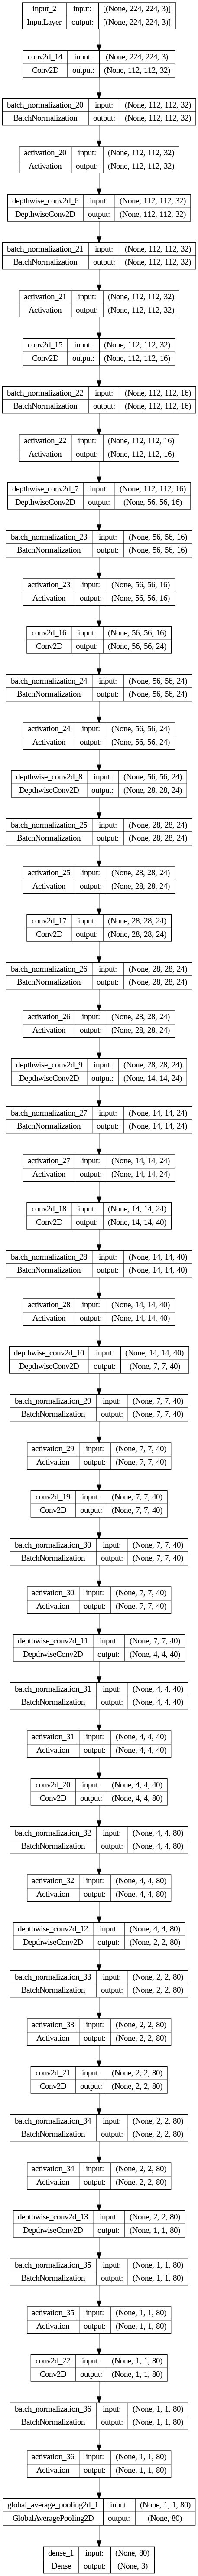

In [ ]:
from tensorflow.keras.utils import plot_model

# Assuming simplified_eff_b3 is your defined model
plot_model(simplified_eff_b3, show_shapes=True)

In [ ]:
history = arch.fit(train_data, epochs=35, validation_data=validation_data)

Epoch 1/35
47/47 [==============================] - 558s 12s/step - loss: 1.3133 - accuracy: 0.3604 - val_loss: 1.4260 - val_accuracy: 0.2462
Epoch 2/35
47/47 [==============================] - 14s 289ms/step - loss: 1.0130 - accuracy: 0.5290 - val_loss: 2.3061 - val_accuracy: 0.2462
Epoch 3/35
47/47 [==============================] - 12s 253ms/step - loss: 0.8457 - accuracy: 0.6051 - val_loss: 4.1482 - val_accuracy: 0.2462
Epoch 4/35
47/47 [==============================] - 11s 243ms/step - loss: 0.7465 - accuracy: 0.6553 - val_loss: 6.3886 - val_accuracy: 0.2462
Epoch 5/35
47/47 [==============================] - 11s 238ms/step - loss: 0.6863 - accuracy: 0.6873 - val_loss: 7.9222 - val_accuracy: 0.2462
Epoch 6/35
47/47 [==============================] - 12s 255ms/step - loss: 0.6151 - accuracy: 0.7264 - val_loss: 7.6816 - val_accuracy: 0.2462
Epoch 7/35
47/47 [==============================] - 12s 259ms/step - loss: 0.5605 - accuracy: 0.7513 - val_loss: 4.6363 - val_accuracy: 0.2462


In [ ]:
# Assuming you have a model and validation data
val_loss, val_accuracy = arch.evaluate(validation_data)

# Print the validation accuracy
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')


10/10 [==============================] - 2s 223ms/step - loss: 2.7587 - accuracy: 0.5109
Validation Accuracy: 51.09%


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, DepthwiseConv2D, BatchNormalization, Activation, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

def improved_simplified_efficient_b3_large(input_shape=(224, 224, 3), num_classes=4):
    inputs = Input(shape=input_shape)

    # Existing Architecture
    x = Conv2D(64, (3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(Activation('relu')(x))

    # Block 1
    x = DepthwiseConv2D(kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(32, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Block 2
    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(48, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(48, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Block 3
    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(80, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(80, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(80, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Additional Blocks
    x = DepthwiseConv2D(kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(120, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(120, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(160, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(160, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(160, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # More Blocks or Layers Can Be Added Here...

    # Global Average Pooling & Classification
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    return Model(inputs=inputs, outputs=outputs)


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, DepthwiseConv2D, BatchNormalization, Activation, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

def improved_simplified_efficient_b3_larger(input_shape=(224, 224, 3), num_classes=4):
    inputs = Input(shape=input_shape)

    # Block 1
    x = Conv2D(64, (3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(Activation('relu')(x))

    x = DepthwiseConv2D(kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(64, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Block 2
    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(128, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(128, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Block 3
    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(256, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(256, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(256, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Additional Blocks
    x = DepthwiseConv2D(kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(512, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(512, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(1024, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(1024, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(1024, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Global Average Pooling & Classification
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    return Model(inputs=inputs, outputs=outputs)
final_mod=improved_simplified_efficient_b3_larger()
final_mod.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])


In [ ]:

final_mod.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_23 (Conv2D)          (None, 112, 112, 64)      1792      
                                                                 
 activation_37 (Activation)  (None, 112, 112, 64)      0         
                                                                 
 batch_normalization_37 (Ba  (None, 112, 112, 64)      256       
 tchNormalization)                                               
                                                                 
 depthwise_conv2d_14 (Depth  (None, 112, 112, 64)      640       
 wiseConv2D)                                                     
                                                                 
 activation_38 (Activation)  (None, 112, 112, 64)      0   

In [ ]:
history = final_mod.fit(train_data, epochs=35, validation_data=validation_data)

Epoch 1/35
47/47 [==============================] - 29s 338ms/step - loss: 0.8865 - accuracy: 0.6083 - val_loss: 3.1192 - val_accuracy: 0.2462
Epoch 2/35
47/47 [==============================] - 12s 254ms/step - loss: 0.5877 - accuracy: 0.7506 - val_loss: 2.1812 - val_accuracy: 0.2462
Epoch 3/35
47/47 [==============================] - 11s 242ms/step - loss: 0.4448 - accuracy: 0.8243 - val_loss: 3.5614 - val_accuracy: 0.2462
Epoch 4/35
47/47 [==============================] - 12s 261ms/step - loss: 0.3172 - accuracy: 0.8737 - val_loss: 2.4254 - val_accuracy: 0.2513
Epoch 5/35
47/47 [==============================] - 13s 286ms/step - loss: 0.1966 - accuracy: 0.9281 - val_loss: 3.2291 - val_accuracy: 0.2462
Epoch 6/35
47/47 [==============================] - 12s 260ms/step - loss: 0.1443 - accuracy: 0.9481 - val_loss: 4.2673 - val_accuracy: 0.2513
Epoch 7/35
47/47 [==============================] - 12s 256ms/step - loss: 0.1273 - accuracy: 0.9541 - val_loss: 4.6220 - val_accuracy: 0.2513

In [ ]:
# Assuming you have a model and validation data
val_loss, val_accuracy = final_mod.evaluate(validation_data)

# Print the validation accuracy
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')


10/10 [==============================] - 3s 258ms/step - loss: 2.9358 - accuracy: 0.5276
Validation Accuracy: 52.76%


Main Block

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, DepthwiseConv2D, BatchNormalization, Activation, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

def improved_simplified_efficient_b3_larger_complex(input_shape=(224, 224, 3), num_classes=4):
    inputs = Input(shape=input_shape)

    # Block 1
    x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(Activation('relu')(x))

    x = DepthwiseConv2D(kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(128, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Block 2
    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(256, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(256, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Block 3
    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(512, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(512, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(512, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Additional Blocks
    x = DepthwiseConv2D(kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(1024, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(1024, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(2048, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(2048, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(2048, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Global Average Pooling & Classification
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    return Model(inputs=inputs, outputs=outputs)

mod = improved_simplified_efficient_b3_larger_complex()
mod.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

history = mod.fit(train_data, epochs=35, validation_data=validation_data)


Epoch 1/35
47/47 [==============================] - 17s 166ms/step - loss: 0.8048 - accuracy: 0.6357 - val_loss: 10.2859 - val_accuracy: 0.2462
Epoch 2/35
47/47 [==============================] - 8s 164ms/step - loss: 0.4705 - accuracy: 0.8100 - val_loss: 22.1245 - val_accuracy: 0.2462
Epoch 3/35
47/47 [==============================] - 8s 169ms/step - loss: 0.3323 - accuracy: 0.8616 - val_loss: 19.9306 - val_accuracy: 0.2462
Epoch 4/35
47/47 [==============================] - 8s 165ms/step - loss: 0.2533 - accuracy: 0.8975 - val_loss: 18.8777 - val_accuracy: 0.2462
Epoch 5/35
47/47 [==============================] - 8s 167ms/step - loss: 0.1504 - accuracy: 0.9452 - val_loss: 21.7748 - val_accuracy: 0.2462
Epoch 6/35
47/47 [==============================] - 8s 160ms/step - loss: 0.1069 - accuracy: 0.9570 - val_loss: 19.5372 - val_accuracy: 0.2462
Epoch 7/35
47/47 [==============================] - 8s 160ms/step - loss: 0.1483 - accuracy: 0.9431 - val_loss: 12.6794 - val_accuracy: 0.251

In [ ]:
mod.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_35 (Conv2D)          (None, 112, 112, 128)     3584      
                                                                 
 activation_54 (Activation)  (None, 112, 112, 128)     0         
                                                                 
 batch_normalization_54 (Ba  (None, 112, 112, 128)     512       
 tchNormalization)                                               
                                                                 
 depthwise_conv2d_19 (Depth  (None, 112, 112, 128)     1280      
 wiseConv2D)                                                     
                                                                 
 activation_55 (Activation)  (None, 112, 112, 128)     0   

In [ ]:
# Assuming you have a model and validation data
val_loss, val_accuracy = mod.evaluate(validation_data)

# Print the validation accuracy
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')


10/10 [==============================] - 3s 258ms/step - loss: 2.3935 - accuracy: 0.5846
Validation Accuracy: 58.46%


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, DepthwiseConv2D, BatchNormalization, Activation, GlobalAveragePooling2D, Dense, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

def improved_simplified_efficient_b3_even_larger(input_shape=(224, 224, 3), num_classes=4):
    inputs = Input(shape=input_shape)

    # Block 1
    x = Conv2D(256, (3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(Activation('relu')(x))

    x = DepthwiseConv2D(kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(256, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Block 2
    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(512, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(512, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Block 3
    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(1024, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(1024, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(1024, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))


    # Additional Blocks
    x = DepthwiseConv2D(kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(2048, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(2048, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(4096, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(4096, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(4096, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Global Average Pooling & Classification
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    return Model(inputs=inputs, outputs=outputs)

larger_mod = improved_simplified_efficient_b3_even_larger()
larger_mod.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

history = larger_mod.fit(train_data, epochs=50, validation_data=validation_data)


Epoch 1/50
47/47 [==============================] - 42s 479ms/step - loss: 0.9036 - accuracy: 0.6318 - val_loss: 15.7650 - val_accuracy: 0.2462
Epoch 2/50
47/47 [==============================] - 11s 226ms/step - loss: 0.4422 - accuracy: 0.8171 - val_loss: 18.8870 - val_accuracy: 0.2462
Epoch 3/50
47/47 [==============================] - 11s 226ms/step - loss: 0.3196 - accuracy: 0.8716 - val_loss: 31.6035 - val_accuracy: 0.2462
Epoch 4/50
47/47 [==============================] - 11s 227ms/step - loss: 0.2558 - accuracy: 0.8965 - val_loss: 38.0674 - val_accuracy: 0.2462
Epoch 5/50
47/47 [==============================] - 11s 226ms/step - loss: 0.1979 - accuracy: 0.9249 - val_loss: 51.7125 - val_accuracy: 0.2462
Epoch 6/50
47/47 [==============================] - 11s 226ms/step - loss: 0.1432 - accuracy: 0.9477 - val_loss: 38.1207 - val_accuracy: 0.2462
Epoch 7/50
47/47 [==============================] - 11s 226ms/step - loss: 0.1111 - accuracy: 0.9591 - val_loss: 56.5554 - val_accuracy:

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, DepthwiseConv2D, BatchNormalization, Activation, GlobalAveragePooling2D, Dense, Add, Multiply, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

def se_block(inputs, reduction_ratio=16):
    channels = inputs.shape[-1]

    x = GlobalAveragePooling2D()(inputs)
    x = Dense(channels // reduction_ratio, activation='relu')(x)
    x = Dense(channels, activation='sigmoid')(x)
    x = Reshape((1, 1, channels))(x)
    x = Multiply()([inputs, x])

    return x

def improved_simplified_efficient_b3_with_attention(input_shape=(224, 224, 3), num_classes=4):
    inputs = Input(shape=input_shape)

    # Block 1
    x = Conv2D(256, (3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(Activation('relu')(x))

    x = DepthwiseConv2D(kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(256, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Block 2
    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(512, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(512, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Block 3
    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(1024, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(1024, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(1024, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Additional Blocks
    x = DepthwiseConv2D(kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(2048, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(2048, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(4096, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(4096, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(4096, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Attention Mechanism (SE block)
    x = se_block(x)

    # Global Average Pooling & Classification
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    return Model(inputs=inputs, outputs=outputs)

larger_mod_with_attention = improved_simplified_efficient_b3_with_attention()
larger_mod_with_attention.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

history10 = larger_mod_with_attention.fit(train_data, epochs=50, validation_data=validation_data)


Epoch 1/50
47/47 [==============================] - 21s 243ms/step - loss: 0.7994 - accuracy: 0.6521 - val_loss: 3.5281 - val_accuracy: 0.2513
Epoch 2/50
47/47 [==============================] - 11s 229ms/step - loss: 0.4651 - accuracy: 0.8100 - val_loss: 13.8843 - val_accuracy: 0.2462
Epoch 3/50
47/47 [==============================] - 11s 230ms/step - loss: 0.3591 - accuracy: 0.8527 - val_loss: 35.0746 - val_accuracy: 0.2462
Epoch 4/50
47/47 [==============================] - 11s 229ms/step - loss: 0.3000 - accuracy: 0.8911 - val_loss: 28.8872 - val_accuracy: 0.2462
Epoch 5/50
47/47 [==============================] - 11s 229ms/step - loss: 0.1998 - accuracy: 0.9224 - val_loss: 33.0969 - val_accuracy: 0.2462
Epoch 6/50
47/47 [==============================] - 11s 229ms/step - loss: 0.1457 - accuracy: 0.9470 - val_loss: 35.2607 - val_accuracy: 0.2462
Epoch 7/50
47/47 [==============================] - 11s 230ms/step - loss: 0.1345 - accuracy: 0.9502 - val_loss: 48.1070 - val_accuracy: 

In [2]:
from tensorflow.keras.layers import Input, Conv2D, DepthwiseConv2D, BatchNormalization, Activation, GlobalAveragePooling2D, Dense, Add, Multiply, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

def se_block(inputs, reduction_ratio=16):
    channels = inputs.shape[-1]

    x = GlobalAveragePooling2D()(inputs)
    x = Dense(channels // reduction_ratio, activation='relu')(x)
    x = Dense(channels, activation='sigmoid')(x)
    x = Reshape((1, 1, channels))(x)
    x = Multiply()([inputs, x])

    return x

def improved_simplified_efficient_b3_deeper_with_attention(input_shape=(224, 224, 3), num_classes=4):
    inputs = Input(shape=input_shape)

    # Block 1
    x = Conv2D(256, (3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(Activation('relu')(x))

    x = DepthwiseConv2D(kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(256, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Block 2
    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(512, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(512, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Block 3
    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(1024, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(1024, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(1024, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Additional Blocks - Add more of these blocks for depth
    for _ in range(4):  # Add 4 more blocks
        x = DepthwiseConv2D(kernel_size=3, strides=1, padding='same')(x)
        x = BatchNormalization()(Activation('relu')(x))
        x = Conv2D(2048, kernel_size=1, strides=1, padding='same')(x)
        x = BatchNormalization()(Activation('relu')(x))
        x = Conv2D(2048, kernel_size=1, strides=1, padding='same')(x)
        x = BatchNormalization()(Activation('relu')(x))

    # Attention Mechanism (SE block)
    x = se_block(x)

    # Global Average Pooling & Classification
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    return Model(inputs=inputs, outputs=outputs)

deeper_mod_with_attention = improved_simplified_efficient_b3_deeper_with_attention()
print(deeper_mod_with_attention.summary())
# deeper_mod_with_attention.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

# history_deeper = deeper_mod_with_attention.fit(train_data, epochs=50, validation_data=validation_data)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_15 (Conv2D)          (None, 112, 112, 256)        7168      ['input_2[0][0]']             
                                                                                                  
 activation_22 (Activation)  (None, 112, 112, 256)        0         ['conv2d_15[0][0]']           
                                                                                                  
 batch_normalization_22 (Ba  (None, 112, 112, 256)        1024      ['activation_22[0][0]']       
 tchNormalization)                                                                          

In [ ]:
# Evaluate the model on the validation data
val_loss, val_accuracy = deeper_mod_with_attention.evaluate(validation_data)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


10/10 [==============================] - 3s 259ms/step - loss: 2.6231 - accuracy: 0.6348
Validation Loss: 2.6231
Validation Accuracy: 0.6348


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, DepthwiseConv2D, BatchNormalization, Activation, GlobalAveragePooling2D, Dense, Add, Multiply, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

def se_block(inputs, reduction_ratio=16):
    channels = inputs.shape[-1]

    x = GlobalAveragePooling2D()(inputs)
    x = Dense(channels // reduction_ratio, activation='relu')(x)
    x = Dense(channels, activation='sigmoid')(x)
    x = Reshape((1, 1, channels))(x)
    x = Multiply()([inputs, x])

    return x

def improved_complex_efficient_b3_with_attention(input_shape=(224, 224, 3), num_classes=4):
    inputs = Input(shape=input_shape)

    # Block 1
    x = Conv2D(64, (3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(Activation('relu')(x))

    # Block 2 - Expand filters
    x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Block 3 - Expand filters
    x = Conv2D(256, (3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Block 4 - Expand filters
    x = DepthwiseConv2D(kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(512, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Block 5 - Expand filters
    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(1024, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Additional Blocks - Expand filters and increase depth
    for _ in range(8):  # Add 8 more blocks
        x = DepthwiseConv2D(kernel_size=3, strides=1, padding='same')(x)
        x = BatchNormalization()(Activation('relu')(x))
        x = Conv2D(2048, kernel_size=1, strides=1, padding='same')(x)
        x = BatchNormalization()(Activation('relu')(x))

    # Attention Mechanism (SE block)
    x = se_block(x)

    # Global Average Pooling & Classification
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    return Model(inputs=inputs, outputs=outputs)

complex_mod_with_attention = improved_complex_efficient_b3_with_attention()
complex_mod_with_attention.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

history_complex = complex_mod_with_attention.fit(train_data, epochs=50, validation_data=validation_data)


Epoch 1/50
47/47 [==============================] - 34s 401ms/step - loss: 0.9080 - accuracy: 0.5777 - val_loss: 1.4165 - val_accuracy: 0.2462
Epoch 2/50
47/47 [==============================] - 16s 333ms/step - loss: 0.6453 - accuracy: 0.7115 - val_loss: 1.5834 - val_accuracy: 0.2513
Epoch 3/50
47/47 [==============================] - 16s 332ms/step - loss: 0.5617 - accuracy: 0.7631 - val_loss: 2.2300 - val_accuracy: 0.2513
Epoch 4/50
47/47 [==============================] - 16s 332ms/step - loss: 0.4121 - accuracy: 0.8332 - val_loss: 3.6319 - val_accuracy: 0.2513
Epoch 5/50
47/47 [==============================] - 16s 332ms/step - loss: 0.3530 - accuracy: 0.8641 - val_loss: 3.7494 - val_accuracy: 0.2513
Epoch 6/50
47/47 [==============================] - 16s 332ms/step - loss: 0.2376 - accuracy: 0.9107 - val_loss: 4.4374 - val_accuracy: 0.2513
Epoch 7/50
47/47 [==============================] - 16s 332ms/step - loss: 0.1995 - accuracy: 0.9278 - val_loss: 4.6289 - val_accuracy: 0.2513

In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have validation_labels (true labels) and complex_mod_with_attention.predict(validation_data) (predicted labels)

# Get the predicted labels for the validation data
predicted_labels = deeper_mod_with_attention.predict(validation_data)

# Convert the predicted probabilities to class labels (assuming argmax is used)
predicted_classes = np.argmax(predicted_labels, axis=1)

# Generate a classification report
report = classification_report(validation_data.classes[:-1], predicted_classes)
print(report)


10/10 [==============================] - 3s 259ms/step
              precision    recall  f1-score   support

           0       0.34      0.22      0.27       150
           1       0.27      0.20      0.23       147
           2       0.27      0.30      0.29       150
           3       0.24      0.36      0.29       150

    accuracy                           0.27       597
   macro avg       0.28      0.27      0.27       597
weighted avg       0.28      0.27      0.27       597



In [ ]:
from tensorflow.keras.layers import Input, Conv2D, DepthwiseConv2D, BatchNormalization, Activation, GlobalAveragePooling2D, Dense, Add, Multiply, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

def se_block(inputs, reduction_ratio=16):
    channels = inputs.shape[-1]

    x = GlobalAveragePooling2D()(inputs)
    x = Dense(channels // reduction_ratio, activation='relu')(x)
    x = Dense(channels, activation='sigmoid')(x)
    x = Reshape((1, 1, channels))(x)
    x = Multiply()([inputs, x])

    return x

def improved_simplified_efficient_b3_deeper_with_attention(input_shape=(224, 224, 3), num_classes=4):
    inputs = Input(shape=input_shape)

    # Block 1
    x = Conv2D(32, (3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(Activation('relu')(x))


      # Block 1
    x = DepthwiseConv2D(kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(32, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Block 2
    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(48, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(48, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Block 3
    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(80, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(80, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(80, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    x = DepthwiseConv2D(kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(256, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Block 2
    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(512, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(512, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Block 3
    x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(1024, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(1024, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))
    x = Conv2D(1024, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(Activation('relu')(x))

    # Additional Blocks - Add more of these blocks for depth
    for _ in range(4):  # Add 4 more blocks
        x = DepthwiseConv2D(kernel_size=3, strides=1, padding='same')(x)
        x = BatchNormalization()(Activation('relu')(x))
        x = Conv2D(2048, kernel_size=1, strides=1, padding='same')(x)
        x = BatchNormalization()(Activation('relu')(x))
        x = Conv2D(2048, kernel_size=1, strides=1, padding='same')(x)
        x = BatchNormalization()(Activation('relu')(x))

    # Attention Mechanism (SE block)
    x = se_block(x)

    # Global Average Pooling & Classification
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    return Model(inputs=inputs, outputs=outputs)

deeper_mod_with_attention2 = improved_simplified_efficient_b3_deeper_with_attention()
deeper_mod_with_attention2.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

history_deeper2 = deeper_mod_with_attention2.fit(train_data, epochs=50, validation_data=validation_data)


Epoch 1/50
47/47 [==============================] - 29s 197ms/step - loss: 1.1559 - accuracy: 0.4664 - val_loss: 1.8143 - val_accuracy: 0.2462
Epoch 2/50
47/47 [==============================] - 7s 153ms/step - loss: 0.7634 - accuracy: 0.6382 - val_loss: 2.5374 - val_accuracy: 0.2462
Epoch 3/50
47/47 [==============================] - 7s 155ms/step - loss: 0.6184 - accuracy: 0.7314 - val_loss: 2.4685 - val_accuracy: 0.2462
Epoch 4/50
47/47 [==============================] - 7s 153ms/step - loss: 0.5258 - accuracy: 0.7798 - val_loss: 4.1570 - val_accuracy: 0.2462
Epoch 5/50
47/47 [==============================] - 8s 160ms/step - loss: 0.4126 - accuracy: 0.8371 - val_loss: 3.0897 - val_accuracy: 0.2462
Epoch 6/50
47/47 [==============================] - 7s 158ms/step - loss: 0.4075 - accuracy: 0.8289 - val_loss: 7.0003 - val_accuracy: 0.2462
Epoch 7/50
47/47 [==============================] - 8s 166ms/step - loss: 0.2557 - accuracy: 0.9000 - val_loss: 7.4215 - val_accuracy: 0.2462
Epoch

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
validation_data.class_indices

{'MildDemented': 0,
 'ModerateDemented(1)': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

In [ ]:

from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

In [ ]:
import numpy as np

In [ ]:
preds = mod.predict_generator(validation_data)
y_pred = np.argmax(preds, axis=1)
print(y_pred)

[0 3 0 1 1 3 2 2 3 2 2 0 0 2 3 1 2 2 0 2 2 0 2 0 0 3 3 0 0 0 3 1 0 3 0 0 0
 3 2 2 1 3 2 0 3 2 3 3 3 0 0 2 1 1 3 2 0 2 0 3 0 0 2 2 2 1 3 3 1 2 0 3 0 3
 1 2 2 3 2 2 0 1 3 3 2 2 1 2 0 0 0 3 1 3 1 3 3 3 2 3 3 1 1 3 1 0 2 3 2 0 2
 2 2 0 3 3 2 2 2 1 0 0 2 0 1 1 3 2 2 2 0 2 0 1 2 0 3 3 3 1 3 0 1 2 3 1 1 2
 2 2 2 3 0 2 0 2 1 3 2 0 0 2 2 1 1 0 2 3 3 2 2 3 1 0 0 0 1 2 1 3 0 0 2 2 0
 0 1 0 2 1 2 1 2 1 3 3 3 2 3 2 2 0 0 0 0 0 3 1 2 0 3 1 3 2 3 0 2 2 2 3 0 2
 3 0 3 2 3 3 2 1 2 3 2 2 0 2 3 3 2 1 3 1 2 1 0 2 0 0 0 3 1 3 0 3 3 0 0 1 3
 0 3 0 0 3 1 2 2 3 1 0 1 1 2 2 1 3 3 2 3 2 1 2 3 3 3 1 3 2 1 1 0 3 3 2 3 1
 3 1 2 2 3 0 3 0 2 3 3 3 3 0 1 1 2 1 2 2 1 2 3 2 1 0 1 3 3 2 1 1 0 1 1 0 1
 3 3 1 1 1 2 2 2 0 0 3 2 3 1 3 1 3 0 3 2 2 3 1 1 3 3 3 0 0 0 2 1 3 3 3 2 2
 0 2 2 0 0 3 3 3 2 3 2 2 1 2 0 2 0 1 1 2 1 0 3 1 2 1 0 3 2 1 2 3 2 1 0 3 3
 0 2 2 2 2 0 2 0 0 2 2 0 3 2 0 3 2 1 2 1 3 3 2 2 0 3 2 2 0 2 2 0 2 3 0 0 2
 0 3 2 2 1 3 3 2 0 0 3 0 1 0 3 1 3 1 2 3 3 0 3 1 3 3 0 0 2 0 3 3 3 2 2 2 1
 2 2 0 2 3 2 3 1 2 0 1 1 

In [ ]:
validation_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,

In [ ]:
import itertools


Confusion Matrix, Without Normalization
[[38 25 47 40]
 [35 28 42 42]
 [32 30 49 39]
 [39 22 54 35]]


NameError: ignored

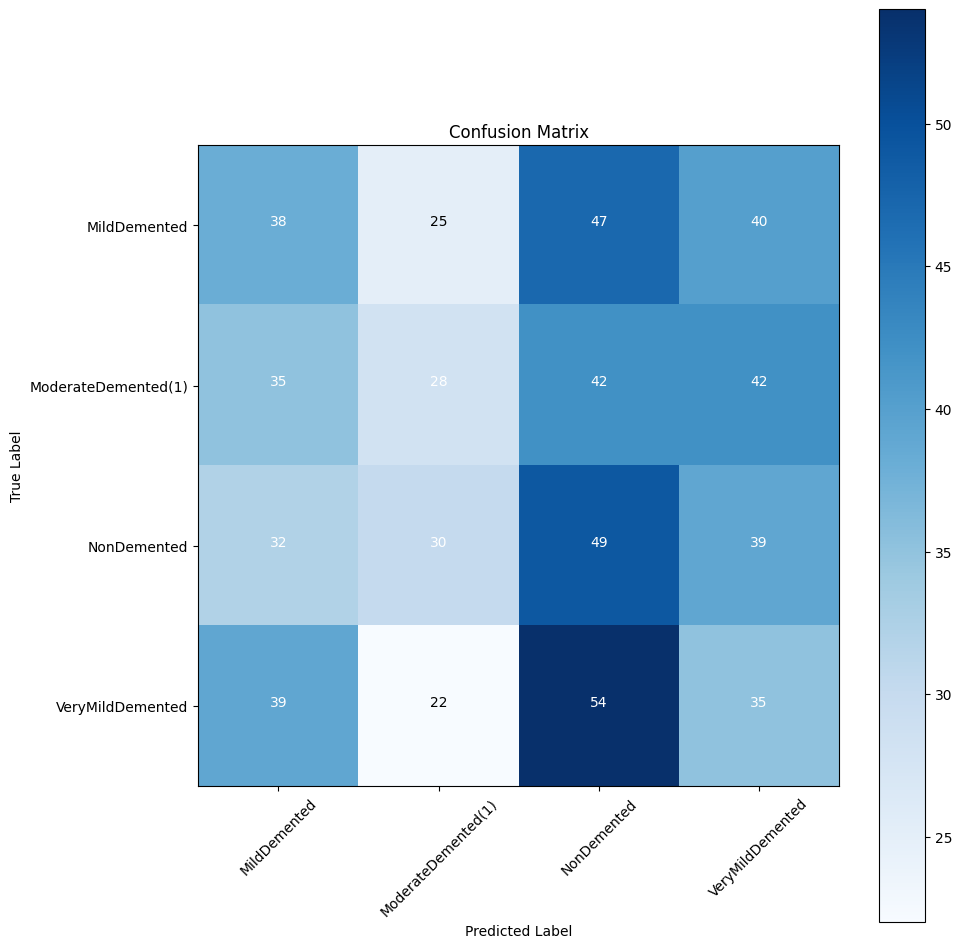

In [ ]:
g_dict =validation_data.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(validation_data.classes, y_pred)
plot_confusion_matrix(cm= cm, classes= classes, title = 'Confusion Matrix')

# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

In [ ]:
def plot_confusion_matrix(cm, classes, normalize= False, title= 'Confusion Matrix', cmap= plt.cm.Blues):
    '''
    This function plot confusion matrix method from sklearn package.
    '''

    plt.figure(figsize= (10, 10))
    plt.imshow(cm, interpolation= 'nearest', cmap= cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation= 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis= 1)[:, np.newaxis]
        print('Normalized Confusion Matrix')

    else:
        print('Confusion Matrix, Without Normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')